# Mini Project - Investigate Hotel Business using Data Visualization

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('D:/Development/Projects/Investigate Hotel Business using Data Visualization/Dataset/hotel_bookings_data.csv')

In [3]:
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_weekdays_nights,adults,...,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status
0,Resort Hotel,0,342,2017,September,27,1,0,0,2,...,3,No Deposit,NaN,NaN,0,Personal,0.0,0,0,Check-Out
1,Resort Hotel,0,737,2017,September,27,1,0,0,2,...,4,No Deposit,NaN,NaN,0,Personal,0.0,0,0,Check-Out
2,Resort Hotel,0,7,2017,September,27,1,0,1,1,...,0,No Deposit,NaN,NaN,0,Personal,75.0,0,0,Check-Out
3,Resort Hotel,0,13,2017,September,27,1,0,1,1,...,0,No Deposit,304.0,NaN,0,Personal,75.0,0,0,Check-Out
4,Resort Hotel,0,14,2017,September,27,1,0,2,2,...,0,No Deposit,240.0,NaN,0,Personal,98.0,0,1,Check-Out


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 29 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_weekdays_nights        119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [5]:
df.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_weekdays_nights               0
adults                                 0
children                               4
babies                                 0
meal                                   0
city                                 488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
booking_changes                        0
deposit_type                           0
agent                              16340
company                           112593
days_in_waiting_list                   0
customer_type   

## Task 1 - Data Preprocessing

1. Mengatasi data null (Hint: Perhatikan jumlah data null dan tipe dari setiap kolom, untuk memilih metode yang tepat.)
2. Mengganti value yang tidak sesuai (Hint: Perhatikan kolom "meal")
3. Membuang data yang tidak diperlukan (Hint: Perhatikan total jumlah tamu untuk setiap pemesanan)

In [6]:
df[df['company'].notnull()].sample()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_weekdays_nights,adults,...,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status
114521,City Hotel,0,27,2019,August,25,19,1,3,1,...,0,No Deposit,NaN,357.0,0,Personal,130.5,0,0,Check-Out


In [7]:
df['city'].sample()

25794    Kota Denpasar
Name: city, dtype: object

In [8]:
df['city'].isnull().sample()

5235    False
Name: city, dtype: bool

In [9]:
df['children'].sample()

42336    0.0
Name: children, dtype: float64

In [10]:
df['children'].isnull().sample()

114202    False
Name: children, dtype: bool

In [11]:
# Kolom agent dan company yang null diisi dengan 0
df['agent'] = df['agent'].fillna(0)
df['company'] = df['company'].fillna(0)

# Kolom children yang null diisi dengan 0
df['children'] = df['children'].fillna(0)

# Kolom city yang null diisi dengan No City
df['city'] = df['city'].fillna('No City')

In [12]:
df.isnull().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_weekdays_nights          0
adults                            0
children                          0
babies                            0
meal                              0
city                              0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
booking_changes                   0
deposit_type                      0
agent                             0
company                           0
days_in_waiting_list              0
customer_type                     0
adr                               0
required_car_parking_spaces       0
total_of_special_requests   

In [13]:
df['meal'].unique()

array(['Breakfast', 'Full Board', 'Dinner', 'No Meal', 'Undefined'],
      dtype=object)

In [14]:
# Pada kolom meal terdapat nilai 'Undefined' dan dapat kita ubah dengan 'No Meal'
df['meal'].replace('Undefined', 'No Meal', inplace = True)

In [15]:
# Membuat kolom guests yang merupakana jumlah dari adults, children, dan babies
df['guest'] = df['adults'] + df['children'] + df['babies']

# Hapus data yang memiliki 0 guest
df_prep = df[df['guest'] > 0].copy()

## Task 2 - Monthly Hotel Booking Analysis Based on Hotel Type

1. Buatlah tabel agregat yang menunjukan perbandingan jumlah pemesanan hotel setiap bulannya berdasarkan jenis hotel (Hint: Perhatikan data tahun kedatangan)
2. Lakukan normalisasi data (Hint: Perhatikan data bulan September dan Oktober)
3. Urutkan data berdasarkan bulan (Hint: Perhatikan penulisan nama bulan untuk mempermudah visualisasi)
4. Buatlah plot yang dapat menunjukan perubahan kenaikan maupun penurunan dari jumlah pemesanan hotel setiap bulannya berdasarkan jenis hotel (Hint: Perhatikan jenis plot yang digunakan)
5. Tuliskan interpretasi terhadap hasil plot pada langkah sebelumnya (Hint: Perhatikan hari libur di Indonesia)

In [16]:
df_prep['arrival_date_year'].unique()

array([2017, 2018, 2019], dtype=int64)

In [17]:
df_2 = df_prep.copy()

In [18]:
# Membuat data agregasi untuk menghitung jumlah pemesanan hotel per bulan berdasarkan tipe hotel
df_2_grouped = df_2.groupby(['hotel', 'arrival_date_month']).agg({'arrival_date_year': ['nunique', 'count']}).reset_index()

# Mengubah nama kolom pada tabel agregasi
df_2_grouped.columns = ['hotel_type', 'arrival_month', 'unique_year', 'num_booking']

df_2_grouped

,hotel_type,arrival_month,unique_year,num_booking
0,City Hotel,April,2,4950
1,City Hotel,August,2,7885
2,City Hotel,December,2,7594
3,City Hotel,February,2,4114
4,City Hotel,January,2,4336
5,City Hotel,July,2,8221
6,City Hotel,June,2,7469
7,City Hotel,March,2,3730
8,City Hotel,May,2,6434
9,City Hotel,November,2,7392


In [19]:
# Normalisasi untuk mendapatkan jumlah rata-rata pemesanan
df_2_grouped['avg_num_booking'] = round(df_2_grouped['num_booking'] / df_2_grouped['unique_year'])

df_2_grouped

,hotel_type,arrival_month,unique_year,num_booking,avg_num_booking
0,City Hotel,April,2,4950,2475.0
1,City Hotel,August,2,7885,3942.0
2,City Hotel,December,2,7594,3797.0
3,City Hotel,February,2,4114,2057.0
4,City Hotel,January,2,4336,2168.0
5,City Hotel,July,2,8221,4110.0
6,City Hotel,June,2,7469,3734.0
7,City Hotel,March,2,3730,1865.0
8,City Hotel,May,2,6434,3217.0
9,City Hotel,November,2,7392,3696.0


In [20]:
# Mengurutkan data berdasarkan bulan dan membuat singkatan bulan supaya lebih mudah
order_months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',
                'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

# Mengambil 3 huruf terdepan dari setiap bulan
df_2_grouped['month'] = df_2_grouped['arrival_month'].str[:3]

# Mengurutkan bulan
df_2_grouped['month'] = pd.Categorical(df_2_grouped['month'], categories=order_months, ordered=True)

df_2_grouped

,hotel_type,arrival_month,unique_year,num_booking,avg_num_booking,month
0,City Hotel,April,2,4950,2475.0,Apr
1,City Hotel,August,2,7885,3942.0,Aug
2,City Hotel,December,2,7594,3797.0,Dec
3,City Hotel,February,2,4114,2057.0,Feb
4,City Hotel,January,2,4336,2168.0,Jan
5,City Hotel,July,2,8221,4110.0,Jul
6,City Hotel,June,2,7469,3734.0,Jun
7,City Hotel,March,2,3730,1865.0,Mar
8,City Hotel,May,2,6434,3217.0,May
9,City Hotel,November,2,7392,3696.0,Nov


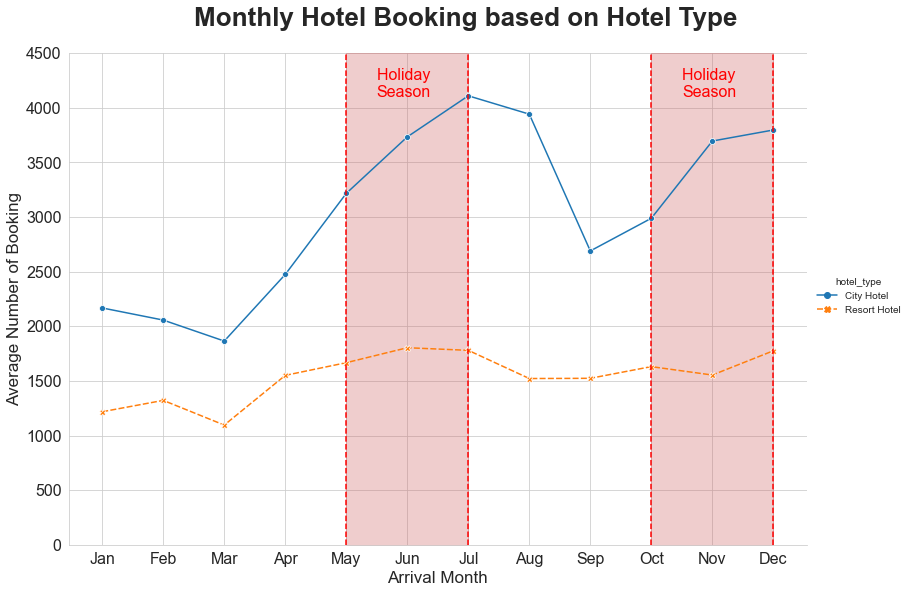

In [21]:
sns.set_style('whitegrid')

g = sns.relplot(x='month', y='avg_num_booking', 
                data=df_2_grouped, 
                kind='line', style='hotel_type', 
                hue='hotel_type', markers=True, 
                height=8, aspect=11/8)

g.fig.suptitle('Monthly Hotel Booking based on Hotel Type', size=26, weight='bold')
g.fig.subplots_adjust(top=.9)

plt.xlabel('Arrival Month', fontsize=17)
plt.ylabel('Average Number of Booking', fontsize=17)
# Membatasi y axis
plt.ylim(0, 4500)

# Memperbesar ukuran x-y axis label
plt.tick_params(axis='both', which='major', labelsize=16)

# Membuat garis vertikal untuk highlight insight
plt.axvline(4, ls='--', color='red')
# Membuat garis vertikal untuk highlight insight
plt.axvline(6, ls='--', color='red')
# Menambahkan teks keterangan
plt.text(x=4.5, y=4100, s='Holiday \nSeason', fontsize=16, color='red')
# Memberikan blok warna pada area yang dihighlight 2 garis vertikal
plt.stackplot(np.arange(4,7,1), [[4500]], color='indianred', alpha=0.3)

# Membuat garis vertikal untuk highlight insight
plt.axvline(9, ls='--', color='red')
# Membuat garis vertikal untuk highlight insight
plt.axvline(11, ls='--', color='red')
# Menambahkan teks keterangan
plt.text(x=9.5, y=4100, s='Holiday \nSeason', fontsize=16, color='red')
# Memberikan blok warna pada area yang dihighlight 2 garis vertikal
plt.stackplot(np.arange(9,12,1), [[4500]], color='indianred', alpha=0.3)

plt.show()

## Task 3 - Impact Analysis of Stay Duration on Hotel Bookings Cancellation Rate

1. Buatlah kolom baru yang berisi total durasi menginap. (Hint: Perhatikan kolom-kolom yang memuat informasi tentang durasi menginap)
2. Kelompokkan nilai-nilai dari kolom baru pada langkah sebelumnya supaya lebih signifikan (Hint: Perhatikan persebaran datanya)
3. Buatlah tabel agregat yang menunjukan perbandingan jumlah pemesanan hotel yang dibatalkan terhadap durasi menginap untuk setiap jenis hotel (Hint: Perhatikan proporsi dari pemesanan yang dibatalkan)
4. Buatlah plot yang dapat menunjukan rasio pembatalan pesanan terhadap durasi menginap untuk setiap tipe hotel (Hint: Perhatikan jenis plot yang digunakan)
5. Tuliskan interpretasi terhadap hasil plot pada langkah sebelumnya (Hint: Perhatikan pengaruh dari durasi menginap terhadap tingkat pembatalan pemesanan hotel)

In [22]:
df_3 = df_prep.copy()

In [23]:
df_3['total_nights'] = df_3['stays_in_weekend_nights'] + df_3['stays_in_weekdays_nights']

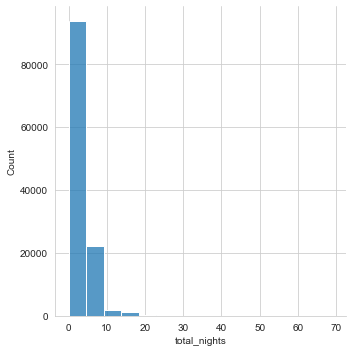

In [24]:
sns.displot(df_3['total_nights'], bins=15)

In [25]:
# Mengelompokkan data berdasarkan hasil dari distribusi data
df_3['total_nights_group'] = np.where(df_3['total_nights'] > 21, 21, 
                                      np.where(df_3['total_nights'] > 14, 15, df_3['total_nights']))

In [26]:
# Membuat tabel agregasi
df_3_grouped = df_3.groupby(['hotel', 'is_canceled', 'total_nights_group'])['arrival_date_month'].count().reset_index(name='num_bookings')
df_3_pivot = df_3_grouped.pivot_table(index=['hotel', 'total_nights_group'], columns='is_canceled', values='num_bookings').reset_index()
df_3_pivot['pct_canceled'] = round(df_3_pivot[1] * 100.0 / (df_3_pivot[0] + df_3_pivot[1]), 2)

df_3_pivot

is_canceled,hotel,total_nights_group,0,1,pct_canceled
0,City Hotel,0,251,13,4.92
1,City Hotel,1,9155,4103,30.95
2,City Hotel,2,10983,10432,48.71
3,City Hotel,3,11889,9482,44.37
4,City Hotel,4,7694,4853,38.68
5,City Hotel,5,3210,1775,35.61
6,City Hotel,6,1111,938,45.78
7,City Hotel,7,1245,808,39.36
8,City Hotel,8,205,176,46.19
9,City Hotel,9,119,93,43.87


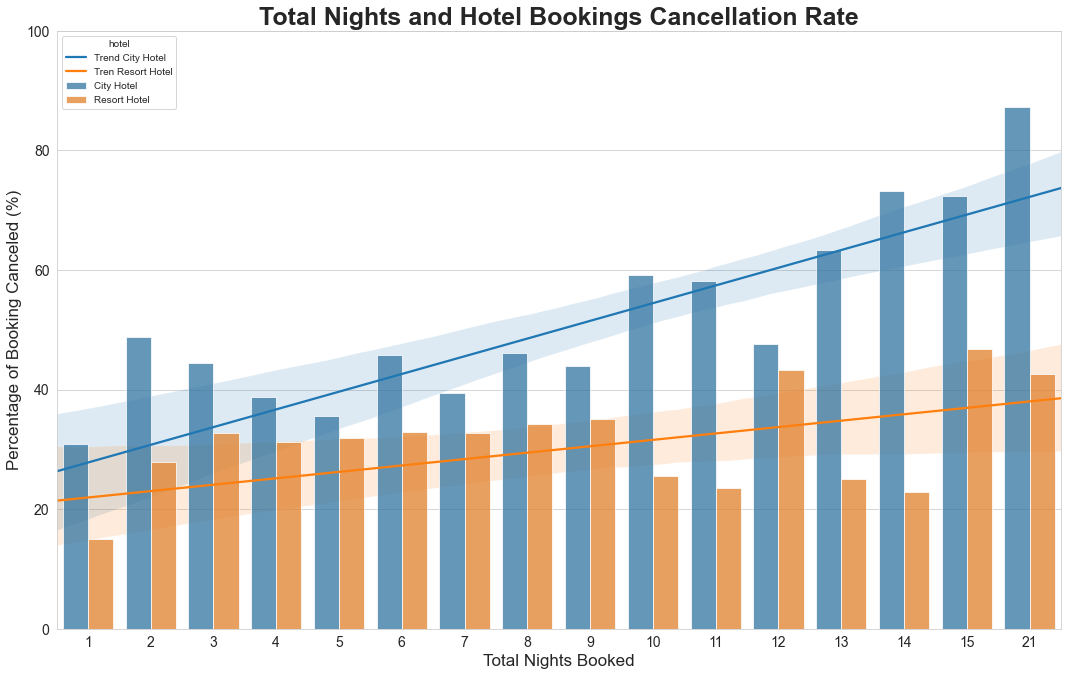

In [27]:
plt.figure(figsize=(18,11))

sns.regplot(x='total_nights_group', y='pct_canceled', data=df_3_pivot[df_3_pivot['hotel'] == 'City Hotel'], scatter=False, label='Trend City Hotel')
sns.regplot(x='total_nights_group', y='pct_canceled', data=df_3_pivot[df_3_pivot['hotel'] == 'Resort Hotel'], scatter=False, label='Tren Resort Hotel')
sns.barplot(x='total_nights_group', y='pct_canceled', hue='hotel', data=df_3_pivot, alpha=0.75)

plt.tick_params(axis='both', which='major', labelsize=14)

plt.title('Total Nights and Hotel Bookings Cancellation Rate', fontsize=25, fontweight='bold')

plt.xlabel('Total Nights Booked', fontsize=17)
plt.ylabel('Percentage of Booking Canceled (%)', fontsize=17)
plt.xlim(0.5, 16.5)
plt.ylim(0, 100)

plt.show()

## Task 4 - Impact Analysis of Lead Time on Hotel Bookings Cancellation Rate

1. Buatlah kolom baru yang berisi kategorisasi dari kolom jarak waktu pemesanan (Hint: Perhatikan interval dalam membuat kategorisasi)
2. Buatlah tabel agregat yang menunjukan perbandingan jumlah pemesanan hotel yang dibatalkan terhadap jarak waktu pemesanan untuk setiap jenis hotel (Hint: Perhatikan proporsi dari pemesanan yang dibatalkan)
3. Buatlah plot yang dapat menunjukan rasio pembatalan pesanan terhadap jarak waktu pemesanan untuk setiap tipe hotel (Hint: Perhatikan jenis plot yang digunakan)
4. Tuliskan interpretasi terhadap hasil plot pada langkah sebelumnya (Hint: Perhatikan pengaruh interval waktu)

In [28]:
df_4 = df_prep.copy()

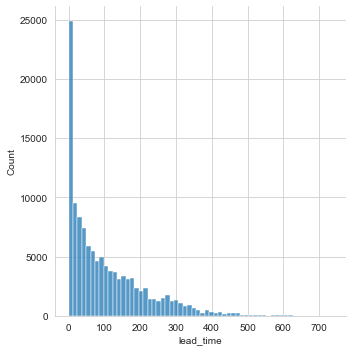

In [29]:
sns.displot(df_4['lead_time'], bins=60)

In [30]:
df_4['lead_time'].unique()

array([342, 737,   7,  13,  14,   0,   9,  85,  75,  23,  35,  68,  18,
        37,  12,  72, 127,  78,  48,  60,  77,  99, 118,  95,  96,  69,
        45,  40,  15,  36,  43,  70,  16, 107,  47, 113,  90,  50,  93,
        76,   3,   1,  10,   5,  17,  51,  71,  63,  62, 101,   2,  81,
       368, 364, 324,  79,  21, 109, 102,   4,  98,  92,  26,  73, 115,
        86,  52,  29,  30,  33,  32,   8, 100,  44,  80,  97,  64,  39,
        34,  27,  82,  94, 110, 111,  84,  66, 104,  28, 258, 112,  65,
        67,  55,  88,  54, 292,  83, 105, 280, 394,  24, 103, 366, 249,
        22,  91,  11, 108, 106,  31,  87,  41, 304, 117,  59,  53,  58,
       116,  42, 321,  38,  56,  49, 317,   6,  57,  19,  25, 315, 123,
        46,  89,  61, 312, 299, 130,  74, 298, 119,  20, 286, 136, 129,
       124, 327, 131, 460, 140, 114, 139, 122, 137, 126, 120, 128, 135,
       150, 143, 151, 132, 125, 157, 147, 138, 156, 164, 346, 159, 160,
       161, 333, 381, 149, 154, 297, 163, 314, 155, 323, 340, 35

In [31]:
# Mengkategorisasi kolom lead_time menjadi lebih sederhana

# lead_time dengan value yangg besar (lebih dari 400) dikategorisasikan menjadi satu group
df_4['lead_times'] = np.where(df_4['lead_time'] > 400, 401, df_4['lead_time']) 
bins = list(np.arange(0,max(df_4['lead_times'])+30, 30))
labels = ["{0}-{1}".format(str(bins[x]), str(bins[x+1])) for x in range(len(bins[:-1]))]
# Groupping lead_time untuk setiap kelipatan 30
df_4['lead_time_group'] = pd.cut(df_4['lead_times'],bins=bins, include_lowest=True, labels=labels)

In [32]:
# Melakukan agregasi data untuk menghitung jumlah pemesanan berdasarkan group lead_time yang sudah ada dan berdasarkan tipe hotel
df_4_grouped = df_4.groupby(['hotel', 'lead_time_group', 'is_canceled'])['hotel'].count().reset_index(name='num_bookings')

df_4_pivot = df_4_grouped.pivot_table(index=['hotel','lead_time_group'], columns='is_canceled', values='num_bookings').reset_index()
df_4_pivot.columns = ['hotel_type','lead_time_group', 'not_canceled', 'canceled']
df_4_pivot['all_bookings'] = df_4_pivot['not_canceled'] + df_4_pivot['canceled']
df_4_pivot['pct_canceled'] = df_4_pivot['canceled'] * 100.0 / (df_4_pivot['all_bookings']) 

df_4_pivot

,hotel_type,lead_time_group,not_canceled,canceled,all_bookings,pct_canceled
0,City Hotel,0-30,18060,5184,23244,22.302530
1,City Hotel,30-60,7266,4608,11874,38.807479
2,City Hotel,60-90,5210,3692,8902,41.473826
3,City Hotel,90-120,3956,3486,7442,46.842247
4,City Hotel,120-150,3064,2542,5606,45.344274
5,City Hotel,150-180,2442,2716,5158,52.656068
6,City Hotel,180-210,1800,1793,3593,49.902588
7,City Hotel,210-240,1224,1280,2504,51.118211
8,City Hotel,240-270,880,1237,2117,58.431743
9,City Hotel,270-300,660,1859,2519,73.799127


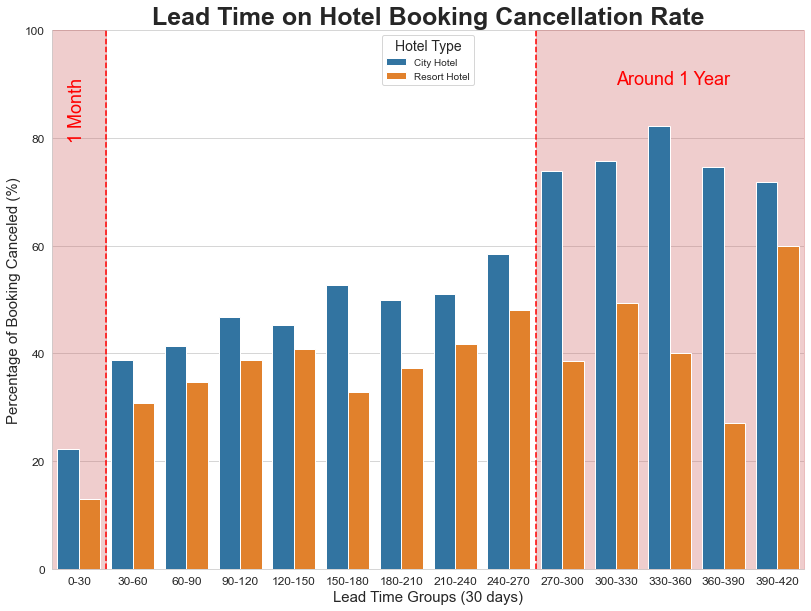

In [33]:
sns.set_style('whitegrid')

sns.catplot(x='lead_time_group', y='pct_canceled', 
           data=df_4_pivot, hue='hotel_type', 
           kind='bar', height=8, aspect=11/8, legend=False)

plt.title('Lead Time on Hotel Booking Cancellation Rate', fontsize=25, fontweight='bold')
plt.xlabel('Lead Time Groups (30 days)', fontsize=15)
plt.ylabel('Percentage of Booking Canceled (%)', fontsize=15)
plt.legend(title='Hotel Type', title_fontsize=14, loc=9)
plt.xlim(-0.5,13.5)
plt.ylim(0, 100)

plt.tick_params(axis='both', which='major', labelsize=12)

# Membuat garis vertikal untuk highlight insight
plt.axvline(0.5, ls='--', color='red') 
# Menambahkan teks keterangan
plt.text(x=-0.2, y=80, s='1 Month', fontsize=18, color='red', rotation=90)
# Memberikan blok warna pada area yang dihighlight 2 garis vertikal
plt.stackplot(np.arange(-0.5,1.5,1), [[100]], color='indianred', alpha=0.3) 

# Membuat garis vertikal untuk highlight insight
plt.axvline(8.5, ls='--', color='red')
# Menambahkan teks keterangan
plt.text(x=10, y=90, s='Around 1 Year', fontsize=18, color='red')
# Memberikan blok warna pada area yang dihighlight 2 garis vertikal
plt.stackplot(np.arange(8.5,14.5,1), [[100]], color='indianred', alpha=0.3)

plt.show()